In [1]:
root_dir = "GTSRB/Train/"

In [2]:
from skimage import io
import os
import glob

all_img_paths = glob.glob(os.path.join(root_dir, "*/*.png"))
all_img_paths[-5:]

['GTSRB/Train/25/00025_00009_00016.png',
 'GTSRB/Train/25/00025_00037_00007.png',
 'GTSRB/Train/25/00025_00026_00020.png',
 'GTSRB/Train/25/00025_00026_00008.png',
 'GTSRB/Train/25/00025_00018_00019.png']

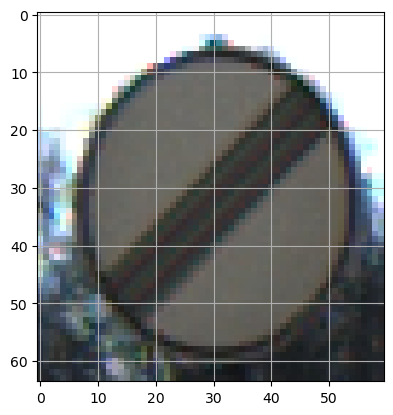

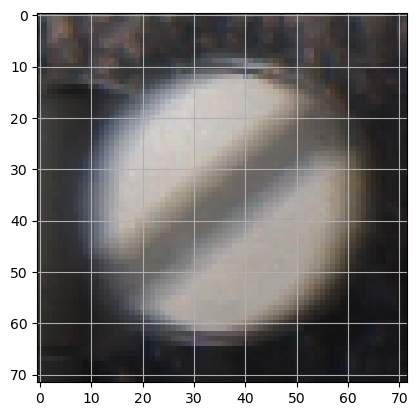

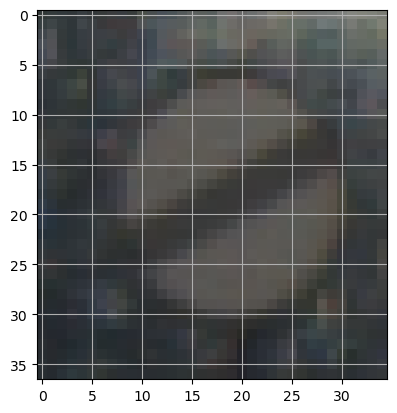

In [3]:
import matplotlib.pyplot as plt
import cv2

for img_path in all_img_paths[0:30:10]:
    img = cv2.imread(img_path)
    plt.imshow(img)
    plt.grid('off')
    plt.show()

In [4]:
from skimage import color, exposure, transform

IMG_SIZE = 40

def preprocessing_img(img):
    hsv = color.rgb2hsv(img)
    hsv[:, :, 2] = exposure.equalize_hist(hsv[:, :, 2])
    img = color.hsv2rgb(hsv)
    img = transform.resize(img, (IMG_SIZE, IMG_SIZE))

    return img

In [5]:
import numpy as np

img_eg = np.array(preprocessing_img(io.imread(all_img_paths[0])))
print(img_eg.shape)

max1 = np.max(img_eg)
print(max1) # 0~1

max2 = np.array(io.imread(all_img_paths[0]))
max2 = np.max(max2)
print(max2) # 0~255

(40, 40, 3)
1.0
255


Transformed


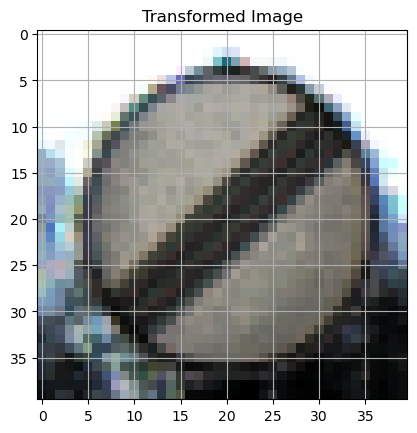

Transformed


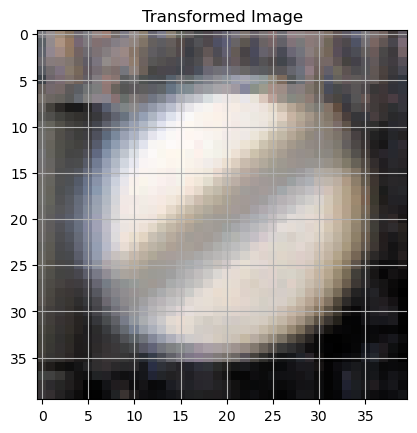

Transformed


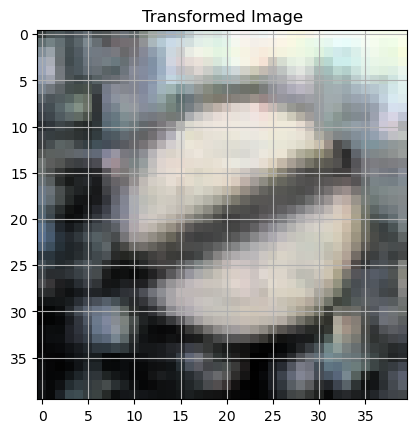

In [6]:
for img_path in all_img_paths[0:30:10]:
    img = cv2.imread(img_path)
    img = preprocessing_img(img)
    print("Transformed")
    
    plt.imshow(img)
    plt.grid('off')
    plt.title("Transformed Image")
    plt.show()

In [10]:
from tensorflow.keras.utils import to_categorical

imgs = []
labels = []
for img_path in all_img_paths:
    img = preprocessing_img(io.imread(img_path))
    label = img_path.split('/')[-2]
    imgs.append(img)
    labels.append(label)

X = np.array(imgs)
print(X.shape)
print(np.max(X))

classes = len(set(np.array(labels)))
print(classes)

y = to_categorical(labels, num_classes=classes)

(39209, 40, 40, 3)
1.0
43


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")

X_train: (31367, 40, 40, 3)
y_train: (31367, 43)
X_test: (7842, 40, 40, 3)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()

model.add(
    Conv2D(32, kernel_size=(3, 3),padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3))
)
model.add(
    Conv2D(32, kernel_size=(3, 3), activation='relu')
)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(
    Conv2D(64, kernel_size=(3, 3),padding='same', activation='relu')
)
model.add(
    Conv2D(64, kernel_size=(3, 3), activation='relu')
)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(
    Conv2D(128, kernel_size=(3, 3),padding='same', activation='relu')
)
model.add(
    Conv2D(128, kernel_size=(3, 3), activation='relu')
)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 38, 38, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 19, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 19, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 17, 17, 64)        36928     
                                                        

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size=32, epochs=10)

Epoch 1/10


2024-11-12 20:10:01.214661: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


981/981 [==============================] - 24s 24ms/step - loss: 1.2131 - accuracy: 0.6434 - val_loss: 0.1637 - val_accuracy: 0.9498
Epoch 2/10
981/981 [==============================] - 24s 24ms/step - loss: 0.1985 - accuracy: 0.9371 - val_loss: 0.0850 - val_accuracy: 0.9750
Epoch 3/10
981/981 [==============================] - 24s 25ms/step - loss: 0.1136 - accuracy: 0.9658 - val_loss: 0.0555 - val_accuracy: 0.9839
Epoch 4/10
981/981 [==============================] - 25s 25ms/step - loss: 0.0912 - accuracy: 0.9724 - val_loss: 0.0400 - val_accuracy: 0.9885
Epoch 5/10
981/981 [==============================] - 25s 26ms/step - loss: 0.0745 - accuracy: 0.9771 - val_loss: 0.0370 - val_accuracy: 0.9897
Epoch 6/10
981/981 [==============================] - 25s 25ms/step - loss: 0.0712 - accuracy: 0.9778 - val_loss: 0.0430 - val_accuracy: 0.9872
Epoch 7/10
981/981 [==============================] - 26s 26ms/step - loss: 0.0614 - accuracy: 0.9819 - val_loss: 0.0380 - val_accuracy: 0.9878
Epo

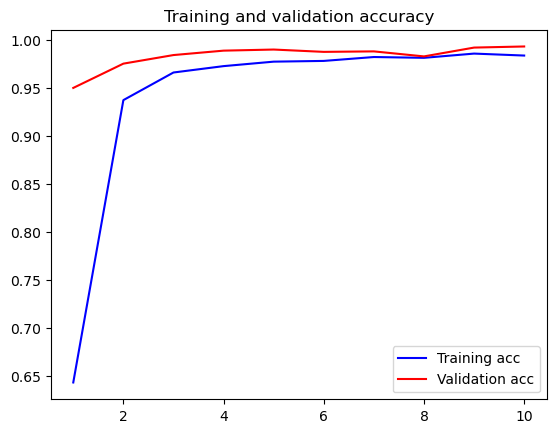

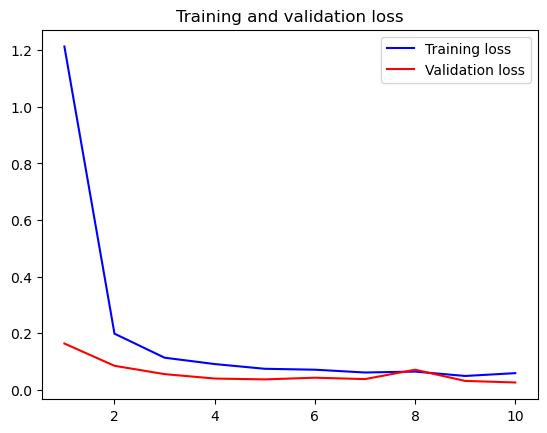

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()